<a href="https://colab.research.google.com/github/sabbaninikhitha/Breast_Cancer_detection-/blob/main/using_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
from google.colab import files
df=pd.read_csv('/content/drive/MyDrive/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [ ]:
#split into dependant and independent variable

y = df["diagnosis"]
x = df.drop(["diagnosis"],axis=1)


In [ ]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
# PCA needs scaled data
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(x)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = standardized.transform(x)

In [ ]:
# Build PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [ ]:
fit = pca.fit(x_pca)
print("Explained Variance: %s") #% fit.explained_variance_ratio_
print(fit.components_)

Explained Variance: %s
[[ 1.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  6.66133815e-16 -7.77156117e-16
  -8.32667268e-17]
 [-0.00000000e+00 -3.05311332e-16  1.00000000e+00  1.55847557e-13
  -3.48696766e-14]
 [-0.00000000e+00  6.66133815e-16 -1.55889190e-13  1.00000000e+00
  -1.85094995e-13]
 [ 0.00000000e+00  8.32667268e-17  3.48852891e-14  1.85115812e-13
   1.00000000e+00]]


In [ ]:
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= df['diagnosis'].apply(diag)
df['diagnosis'].replace('M',1,inplace=True)
df['diagnosis'].replace('B',0,inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
x_pca[:1]

array([[ 9.19283683,  1.94858307, -1.12316618,  3.63373083, -1.19511012]])

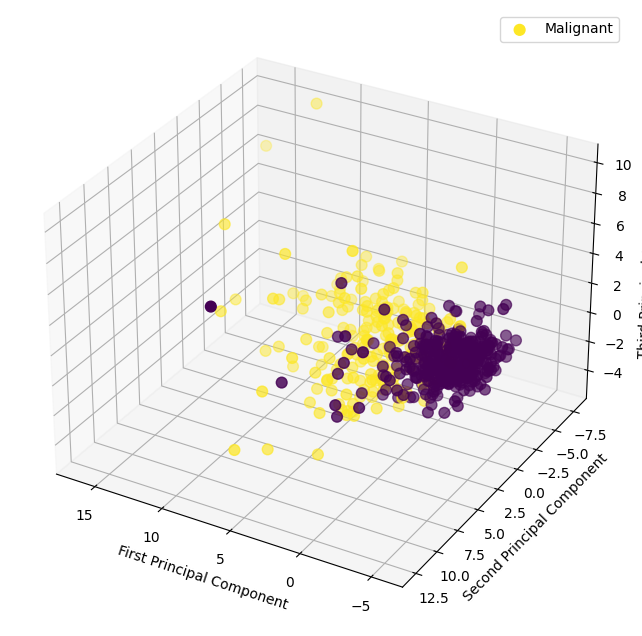

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malignant'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

In [ ]:
pca_data = pd.DataFrame(x_pca)
pca_data["diagnosis"] = y

In [ ]:
pca_data.head()

,0,1,2,3,4,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,1


Text(345.72222222222223, 0.5, 'Principal Components')

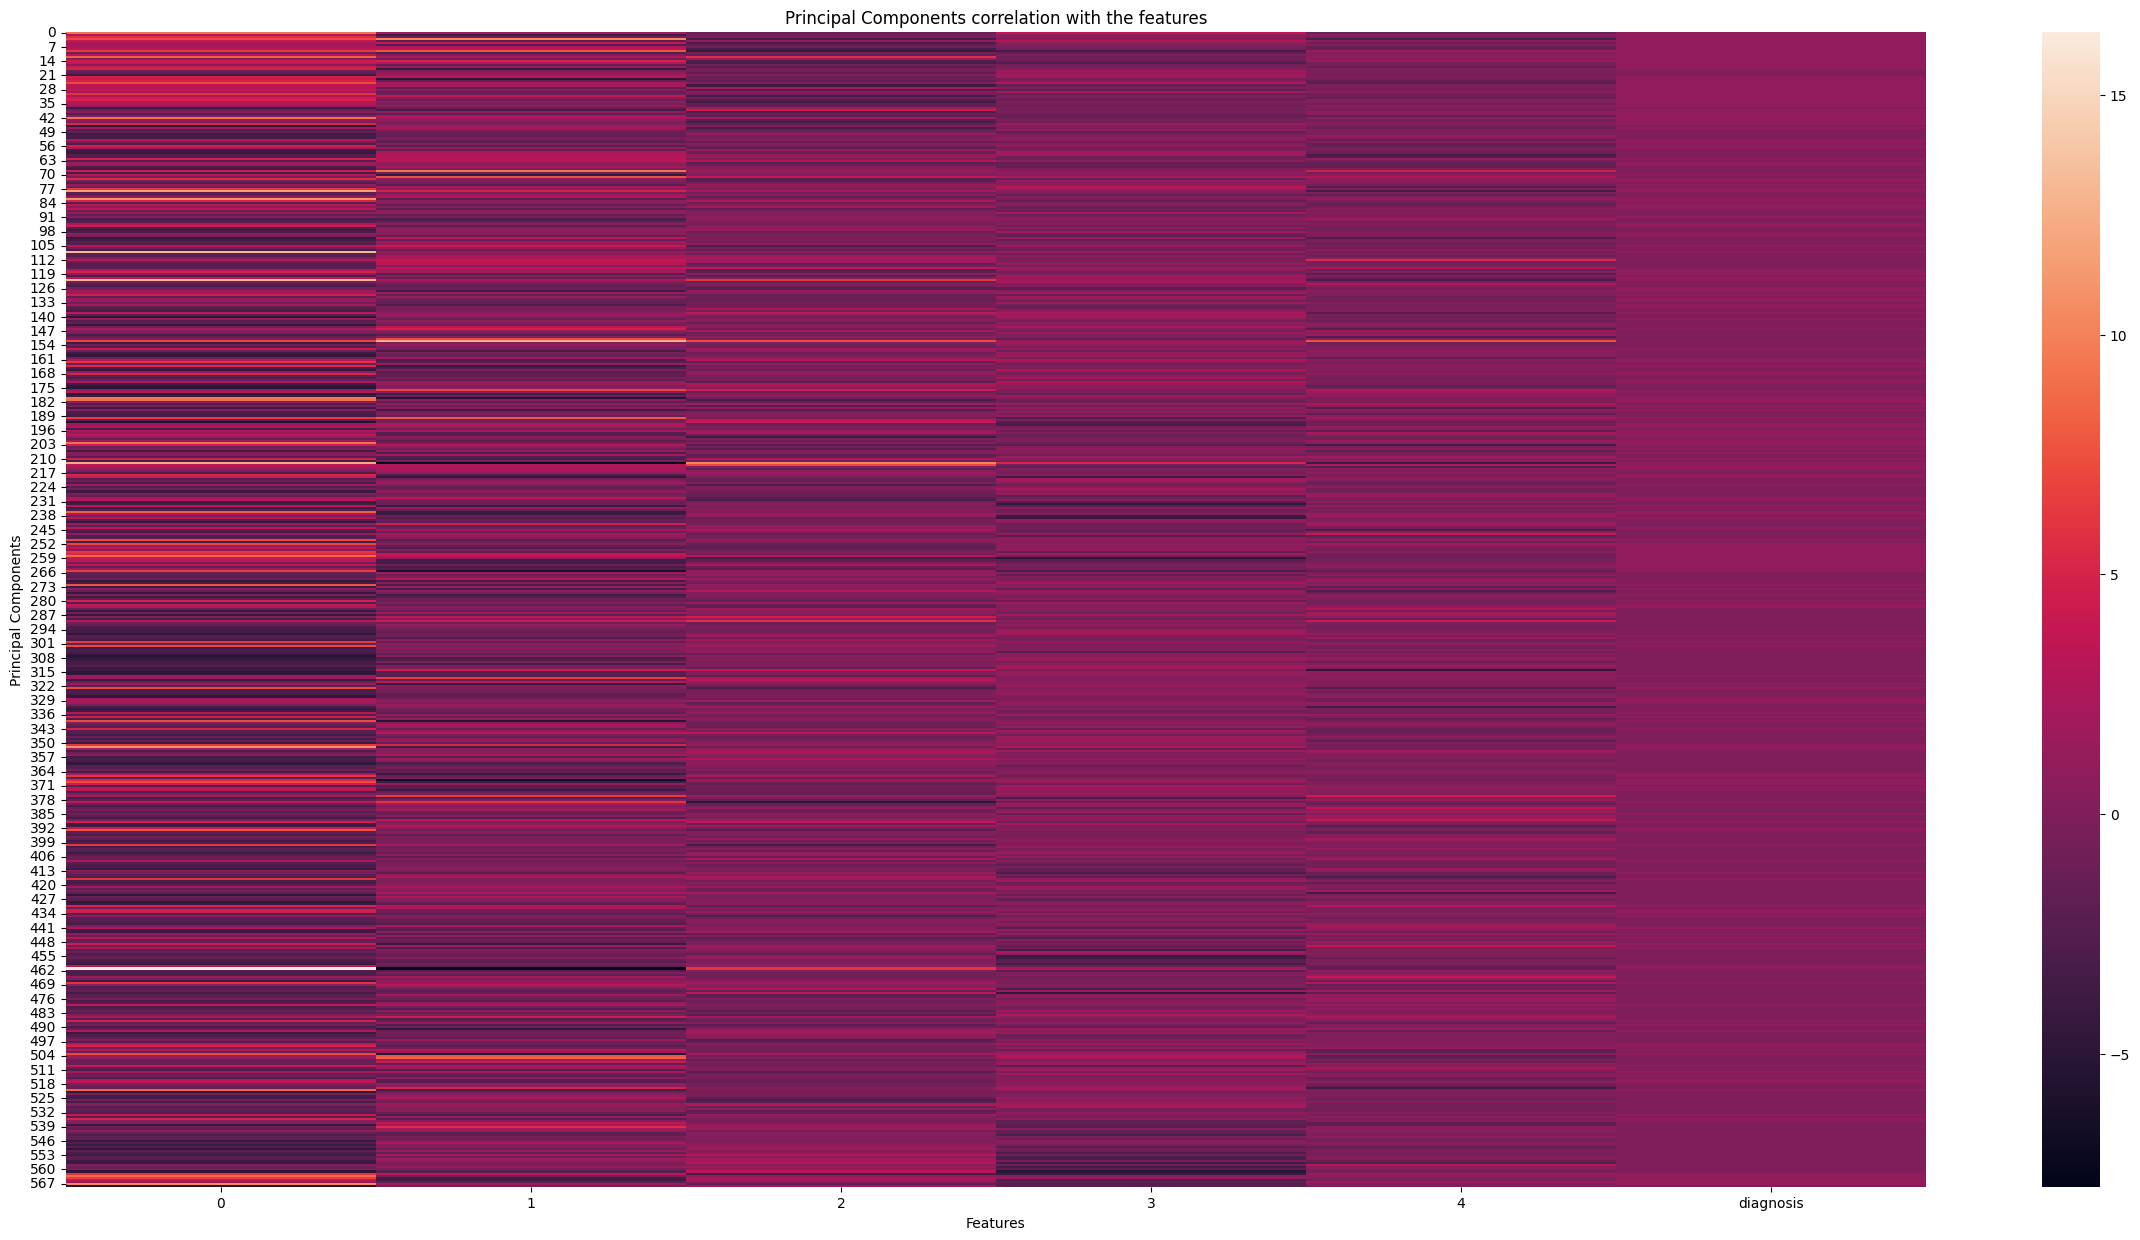

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(pca_data)
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

In [ ]:
#Prepare X and Y
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

In [ ]:
x_pca

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723
566,1.256179,-1.902297,0.562731,-2.089227,1.809991
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742


In [ ]:
y_pca

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
#split data set into traing and testing
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.25, random_state=0)

In [ ]:
def train_models(X_train_selected, Y_train):
    # Initialize a list to store trained models and their accuracies
    models = []

    # Import necessary libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB

    # Logistic Regression
    log = LogisticRegression(random_state=42)
    log.fit(x_train_pca, y_train_pca)
    log_accuracy = log.score(x_train_pca, y_train_pca)
    models.append(("Logistic Regression", log, log_accuracy))

    # Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
    tree.fit(x_train_pca, y_train_pca)
    tree_accuracy = tree.score(x_train_pca, y_train_pca)
    models.append(("Decision Tree", tree, tree_accuracy))

    # Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
    forest.fit(x_train_pca, y_train_pca)
    forest_accuracy = forest.score(x_train_pca, y_train_pca)
    models.append(("Random Forest", forest, forest_accuracy))

    # SVM Linear
    svc_model = SVC(kernel='linear', random_state=42)
    svc_model.fit(x_train_pca, y_train_pca)
    svc_accuracy = svc_model.score(x_train_pca, y_train_pca)
    models.append(("SVM Linear", svc_model, svc_accuracy))

    # SVM RBF
    svc_rbf = SVC(kernel='rbf', random_state=42)
    svc_rbf.fit(x_train_pca, y_train_pca)
    svc_rbf_accuracy = svc_rbf.score(x_train_pca, y_train_pca)
    models.append(("SVM RBF", svc_rbf, svc_rbf_accuracy))

    # KNeighbors Classifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(x_train_pca, y_train_pca)
    knn_accuracy = knn.score(x_train_pca, y_train_pca)
    models.append(("KNeighbors", knn, knn_accuracy))

    # Gaussian NB
    gauss = GaussianNB()
    gauss.fit(x_train_pca, y_train_pca)
    gauss_accuracy = gauss.score(x_train_pca, y_train_pca)
    models.append(("Gaussian NB", gauss, gauss_accuracy))

    return models

# Train models
models = train_models(x_train_pca, y_train_pca)

# Print training accuracies
for model_name, _, accuracy in models:
    print(f"{model_name} - Training Accuracy: {accuracy}")


Logistic Regression - Training Accuracy: 0.9835680751173709
Decision Tree - Training Accuracy: 1.0
Random Forest - Training Accuracy: 0.9953051643192489
SVM Linear - Training Accuracy: 0.9835680751173709
SVM RBF - Training Accuracy: 0.9812206572769953
KNeighbors - Training Accuracy: 0.9765258215962441
Gaussian NB - Training Accuracy: 0.9295774647887324


In [ ]:
from sklearn.metrics import confusion_matrix

for i in range(len(models)):
    print('model:', i)
    cm = confusion_matrix(y_test_pca, models[i][1].predict(x_test_pca))
    tp = cm[0][0]
    tn = cm[1][1]
    fn = cm[1][0]
    fp = cm[0][1]

    print(cm)
    print('Testing Accuracy:', (tp + tn) / (tp + tn + fn + fp))
    print()


model: 0
[[88  2]
 [ 3 50]]
Testing Accuracy: 0.965034965034965

model: 1
[[83  7]
 [ 3 50]]
Testing Accuracy: 0.9300699300699301

model: 2
[[86  4]
 [ 5 48]]
Testing Accuracy: 0.9370629370629371

model: 3
[[87  3]
 [ 4 49]]
Testing Accuracy: 0.951048951048951

model: 4
[[87  3]
 [ 4 49]]
Testing Accuracy: 0.951048951048951

model: 5
[[86  4]
 [ 6 47]]
Testing Accuracy: 0.9300699300699301

model: 6
[[85  5]
 [ 7 46]]
Testing Accuracy: 0.916083916083916

